# Лабораторная работа 2. Ассоциативные правила

**Цель работы:** исследование методов анализа ассоциативных правил.

**Датасет - 4-ый вариант:** https://www.kaggle.com/datasets/mathchi/online-retail-data-set-from-ml-repository

**Начальные параметры** для обоих алгоритмов: поддержка **0.15** и достоверность **0.4**.

**Описание**:

Это международный набор реальных данных, который содержит все транзакции, совершённые в период с 01/12/2010 по 09/12/2011 для британского интернет-магазина, работающего без физической торговой точки. Компания в основном продаёт уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовыми покупателями.

| Название переменной | Тип данных | Описание |
| :---: | :--- | :--- |
| **InvoiceNo** | Номинальная | Номер счёта. 6-значный числовой код, уникальный для каждой транзакции. Если код начинается с буквы 'c', это указывает на отмену. |
| **StockCode** | Номинальная | Код товара. 5-значный числовой код, уникальный для каждого отдельного продукта. |
| **Description** | Номинальная | Наименование товара. |
| **Quantity** | Числовая | Количество каждого товара в транзакции. |
| **InvoiceDate** | Числовая | Дата и время выставления счёта. День и время генерации каждой транзакции. |
| **UnitPrice** | Числовая | Цена за единицу. Цена товара за единицу в фунтах стерлингов (£). |
| **CustomerID** | Номинальная | Идентификатор клиента. 5-значный числовой код, уникальный для каждого клиента. |
| **Country** | Номинальная | Название страны. Страна, в которой проживает клиент. |

---

## Описание данных из датасета.

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Artur\AppData\Local\Temp\ipykernel_24968\2918219349.py:5: SyntaxWarning: invalid escape sequence '\d'
  all_data = pd.read_csv('..\datasets\/retail_dataset.csv')


          0       1       2       3       4       5       6
0     Bread    Wine    Eggs    Meat  Cheese  Pencil  Diaper
1     Bread  Cheese    Meat  Diaper    Wine    Milk  Pencil
2    Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
3    Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
4      Meat  Pencil    Wine     NaN     NaN     NaN     NaN
..      ...     ...     ...     ...     ...     ...     ...
310   Bread    Eggs  Cheese     NaN     NaN     NaN     NaN
311    Meat    Milk  Pencil     NaN     NaN     NaN     NaN
312   Bread  Cheese    Eggs    Meat  Pencil  Diaper    Wine
313    Meat  Cheese     NaN     NaN     NaN     NaN     NaN
314    Eggs    Wine   Bagel   Bread    Meat     NaN     NaN

[315 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2  

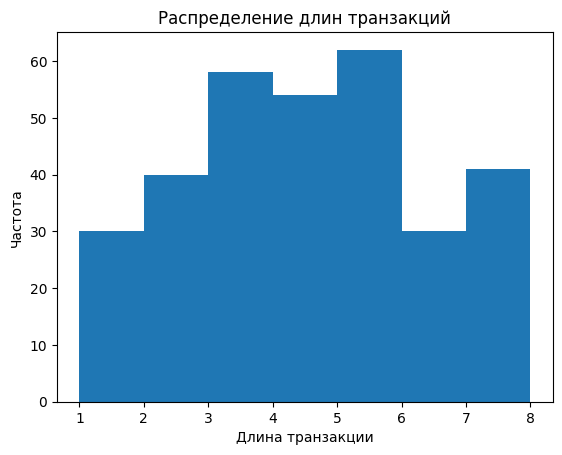

Список уникальных товаров:
{'Bagel', 'Meat', 'Eggs', 'Cheese', 'Milk', 'Bread', 'Wine', 'Diaper', 'Pencil'}


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Загрузка данных
all_data = pd.read_csv('..\datasets\/retail_dataset.csv')
print(all_data)
print(all_data.info())

#Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()

#Очистка данных
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

#Список уникальных товаров
print('Список уникальных товаров:')
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(unique_items)

### Описание данных:
- Кол-во транзакций - 315;
- Максимальное кол-во товаров в транзакции - 7;
- Кол-во уникальных товаров - 9;
- Пропуски увеличиваются к последним столбцам (меньше длинных покупок).
### Анализ распределения длин транзакций:
Больше всего транзакций - от 3 до 5 товаров; небольшая часть транзакций - 1-2 и 6-7 товаров.

Покупатели в среднем приобретают несколько товаров за один раз, но очень длинные корзины встречаются редко.
### Список уникальных товаров:
Среди товаров есть как продукты питания, так и непродовольственные товары, что позволяет исследовать кросс-продажи.

---

## Алгоритм Apriori

     support            itemsets
0   0.326984             (Bagel)
1   0.269841             (Bread)
2   0.323810            (Cheese)
3   0.298413            (Diaper)
4   0.361905              (Eggs)
5   0.374603              (Meat)
6   0.453968              (Milk)
7   0.279365            (Pencil)
8   0.365079              (Wine)
9   0.158730       (Milk, Bagel)
10  0.158730      (Diaper, Wine)
11  0.215873        (Eggs, Meat)
12  0.212698        (Milk, Eggs)
13  0.180952        (Eggs, Wine)
14  0.209524        (Milk, Meat)
15  0.203175        (Meat, Wine)
16  0.168254        (Milk, Wine)
17  0.155556  (Milk, Eggs, Meat)
     antecedents   consequents  antecedent support  consequent support  \
0        (Bagel)        (Milk)            0.326984            0.453968   
1       (Diaper)        (Wine)            0.298413            0.365079   
2         (Wine)      (Diaper)            0.365079            0.298413   
3         (Eggs)        (Meat)            0.361905            0.374603   
4  

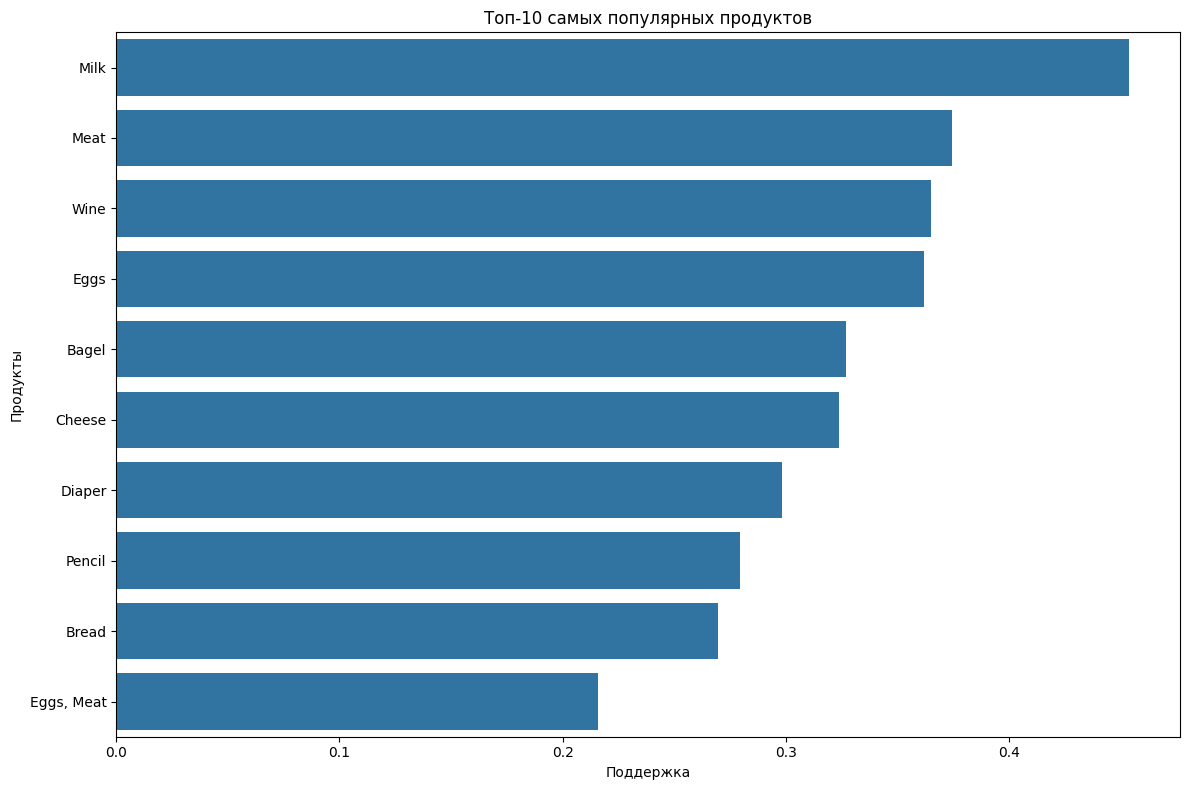

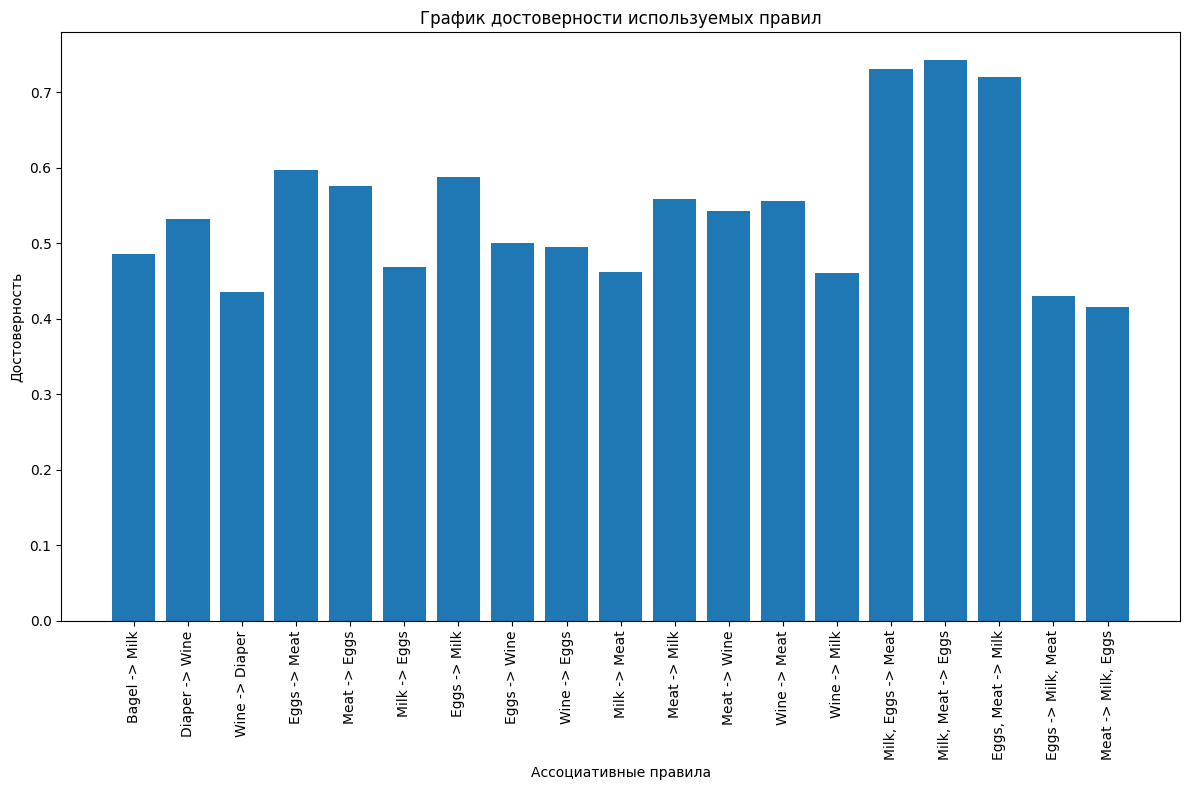

C:\Users\Artur\AppData\Local\Temp\ipykernel_24968\354559901.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


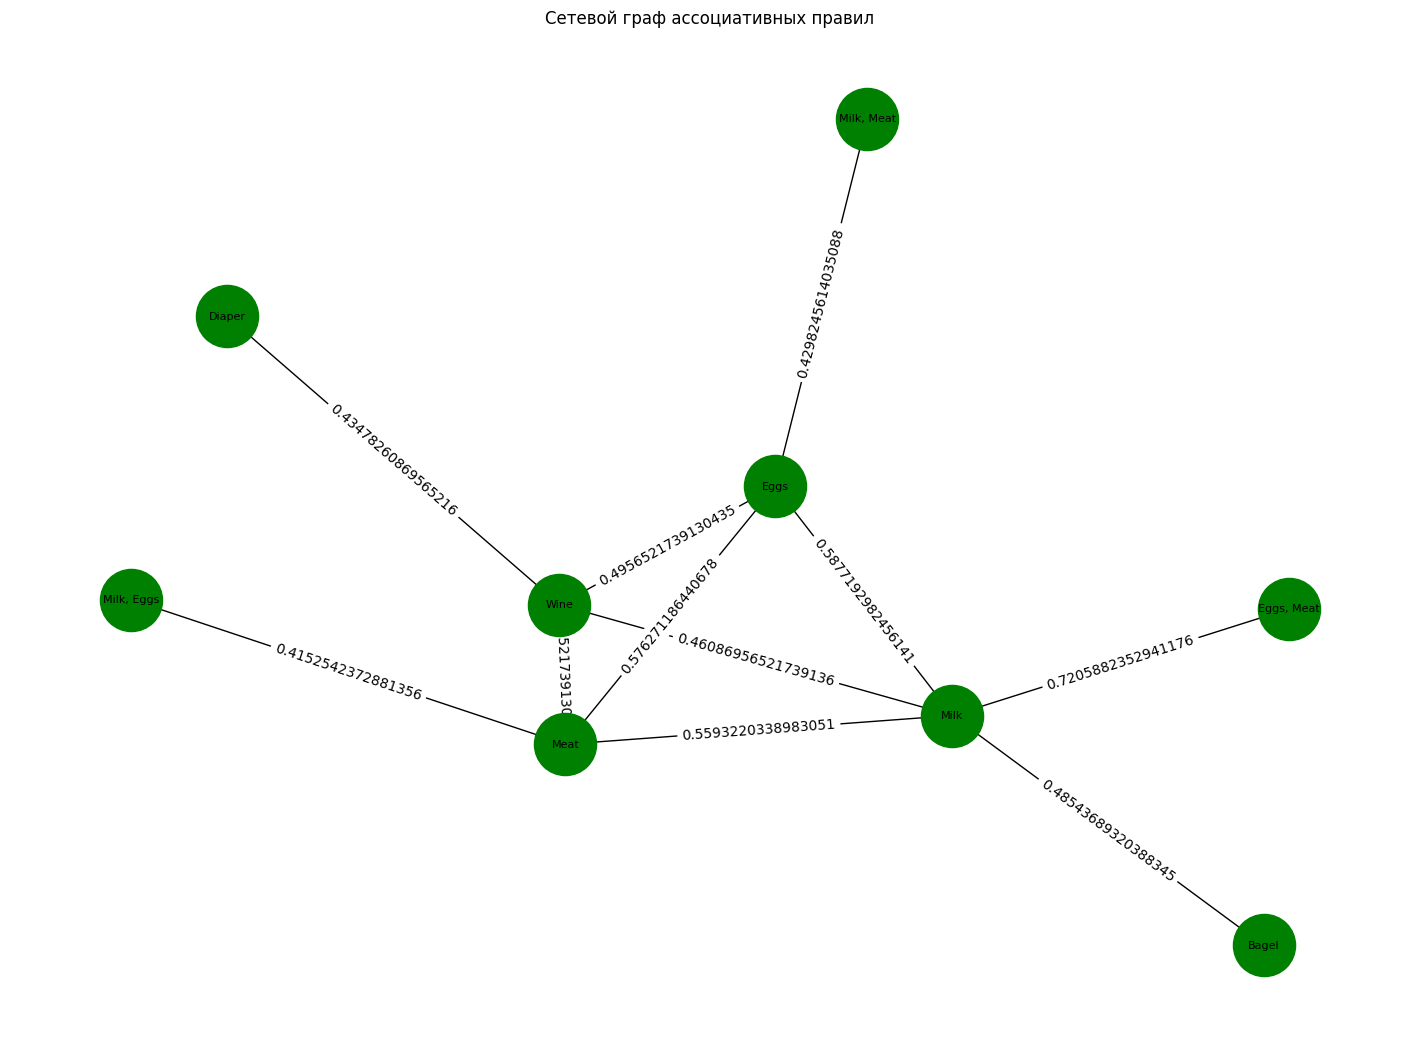

In [ ]:
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

#Преобразование в бинарный формат
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

def arl_analysis(df: pd.DataFrame, min_threshold = 0.4):
    print(df)
    rules = association_rules(df, metric = "confidence", min_threshold = min_threshold)
    print(rules)

    #Поддержка
    df['itemsets'] = df['itemsets'].apply(lambda x: ', '.join(list(x)))
    top_products = df.sort_values(by='support', ascending=False).head(10)
    print(top_products)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='support', y='itemsets', data=top_products)
    plt.title('Топ-10 самых популярных продуктов')
    plt.xlabel('Поддержка')
    plt.ylabel('Продукты')
    plt.tight_layout()
    plt.show()

    rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

    #График достоверности используемых правил
    products_1 = rules["antecedents"].tolist()
    products_2 = rules["consequents"].tolist()
    confidence = rules["confidence"].tolist()
    rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]
    plt.figure(figsize=(12, 8))
    plt.bar(rules_labels, confidence)
    plt.xlabel("Ассоциативные правила")
    plt.ylabel("Достоверность")
    plt.title("График достоверности используемых правил")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    #Визуализация ассоциативных правил в виде графа
    G = nx.Graph()
    for product in rules["antecedents"]:
        G.add_node(product)
    for product in rules["consequents"]:
        G.add_node(product)
    for index, row in rules.iterrows():
        G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.8)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='green', font_size=8)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Сетевой граф ассоциативных правил')
    plt.tight_layout()
    plt.show()

#Начальные параметры
#min_threshold задан по умолчанию как 0.4
min_support = 0.15

#Алгоритм Apriori
df1 = apriori(data, min_support=min_support, use_colnames = True)
arl_analysis(df1)

### Анализ резульатов
Самые популярные товары - **Milk**, **Meat**, **Wine**, **Eggs**.
Непродовольственные товары (например: Pencil, Diaper) тоже довольно часто встречаются (их покупают вместе с продуктами, но реже как основную категорию).

**Анализ сильных и слабых правил:**
| Правило | Support | Confidence | Lift | Интерпретация |
| --- | --- | --- | --- | --- |
| (Milk, Eggs) -> Meat | 0.1556 | 0.73 | 1.95 | Высокая достоверность: покупка молока и яиц почти вдвое увеличивает шанс покупки мяса. Классический продуктовый набор |
| (Milk, Meat) -> Eggs | 0.1556 | 0.74 | 2.05 | Самое сильное правило: вероятность покупки яиц вдвое выше случайной |
| (Eggs, Meat) -> Milk | 0.1556 | 0.72 | 1.59 | Покупка яиц и мяса делает покупку молока почти гарантированной |
| (Eggs) -> Meat | 0.2159 | 0.60 | 1.59 | Яйца часто берут вместе с мясом |
| (Meat) -> Wine | 0.2032 | 0.54 | 1.49 | Покупка вина часто связана с мясом - возможно, набор для ужина |
| (Diaper) -> Wine | 0.1587 | 0.53 | 1.46 | Аналог примера "Пиво -> Подгузники": возможно, паттерн поведения семейных покупателей |
| (Bagel) -> Milk | 0.1587 | 0.49 | 1.07 | Ассоциация слабая: lift ~ 1, значит, связь случайна |

**Полезные и тривиальные правила**
- Полезные правила:
    - (Milk, Meat) -> Eggs
    - (Milk, Eggs) -> Meat
    - (Eggs, Meat) -> Milk
    - (Meat) -> Wine
    - (Diaper) -> Wine
- Тривиальные правила (указывают на популярные товары с высокой базовой вероятностью покупки):
    - (Bagel) -> Milk
    - (Wine) -> Milk

**Интерпретация графиков:**
1. *Топ-10 самых популярных продуктов*

Наиболее часто встречаются товары Milk, Meat, Wine, Eggs. Они формируют основу всех комбинаций.

2. *График достоверности используемых правил*

Самые надёжные связи наблюдаются между Meat, Milk и Eggs - покупаются чаще всего совместно.

3. *Сетевой граф ассоциативных правил*
    - Центральные узлы - Milk, Meat, Wine, Eggs
    - Наиболее связанный элемент - Milk (встречается с большинством других товаров).
    - Отдельные ветви (например, Diaper - Wine) указывают на менее частые, но устойчивые сочетания.

**Общий вывод:**

1. Наиболее сильные взаимосвязи наблюдаются между товарами **Milk**, **Meat**, **Eggs** - классический продуктовый набор.
2. Lift показывает, что:
    - Покупка мяса и молока увеличивает вероятность покупки яиц в **2** раза;
    - Покупка вина увеличивает вероятность покупки мяса в **~1.5** раза, как и увеличивает вероятность покупки подгузников почти в **1.5** раза (что кажется контринтуитивным).
3. Непродовольственные товары чаще всего встречаются с едой, но их связи слабее, что может указывать на случайные покупки / непостоянные комбинации.
4. Центральный товар в покупках - **Milk**: имеет наибольшую поддержку и часто учавствует в ассоциативных правилах. Следовательно, молоко - "универсальный" элемент покупок.
5. Наблюдаются слабые / незначимые связи, например, хлеб и другие продукты. Хотя он и встречается часто, но устойчивых комбинаций с другими продуктами он не образует.

**Оценка влияния параметров на получаемые правила:**
- min_support:
    - Если понизить - алгоритм будеть находить больше редких правил (хотя они могут быть и шумовыми);
    - Если повысить - останутся только частые товары (например комбинация Milk-Meat-Eggs).
- min_threshold (confidence):
    - При низком значении появляются слабые и случайные связи;
    - При высоком - остаются только надёжные, но их меньше.

---

## Алгоритм FPG

     support            itemsets
0   0.374603              (Meat)
1   0.365079              (Wine)
2   0.361905              (Eggs)
3   0.323810            (Cheese)
4   0.298413            (Diaper)
5   0.279365            (Pencil)
6   0.453968              (Milk)
7   0.326984             (Bagel)
8   0.269841             (Bread)
9   0.209524        (Milk, Meat)
10  0.203175        (Meat, Wine)
11  0.168254        (Milk, Wine)
12  0.215873        (Eggs, Meat)
13  0.180952        (Eggs, Wine)
14  0.212698        (Milk, Eggs)
15  0.155556  (Milk, Eggs, Meat)
16  0.158730      (Diaper, Wine)
17  0.158730       (Milk, Bagel)
     antecedents   consequents  antecedent support  consequent support  \
0         (Milk)        (Meat)            0.453968            0.374603   
1         (Meat)        (Milk)            0.374603            0.453968   
2         (Meat)        (Wine)            0.374603            0.365079   
3         (Wine)        (Meat)            0.365079            0.374603   
4  

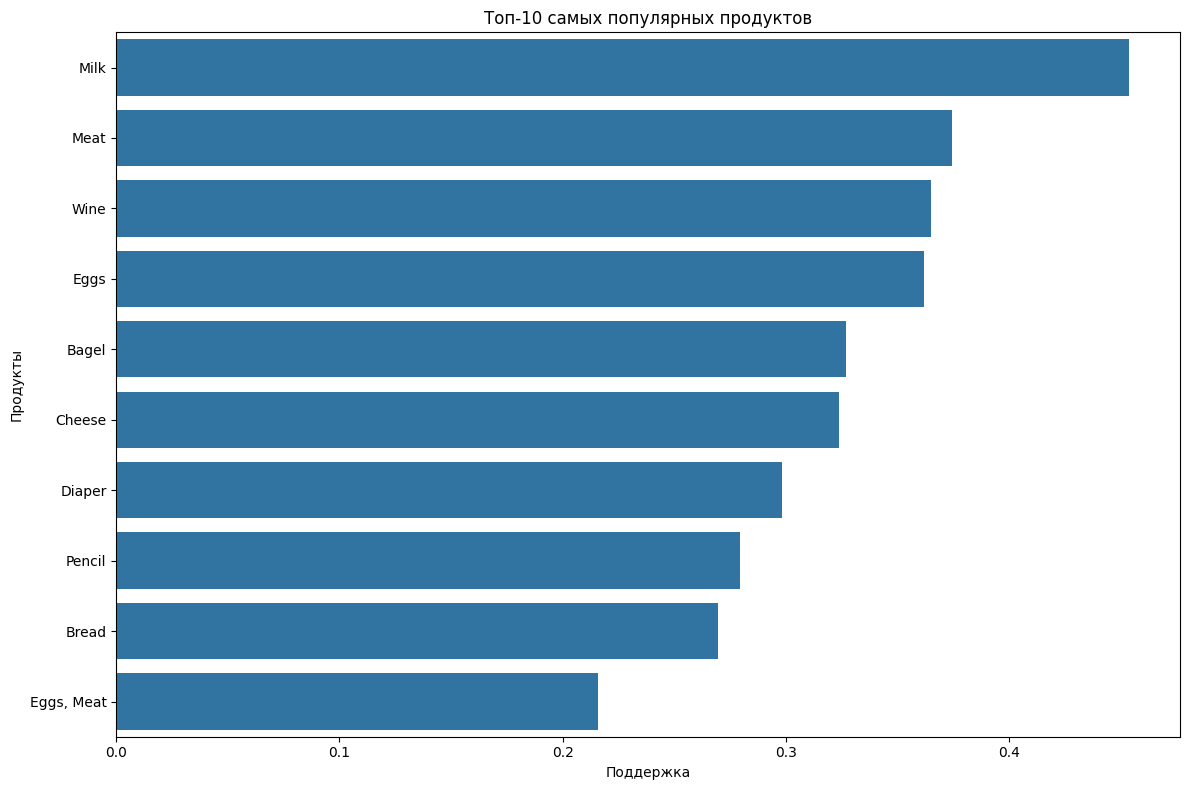

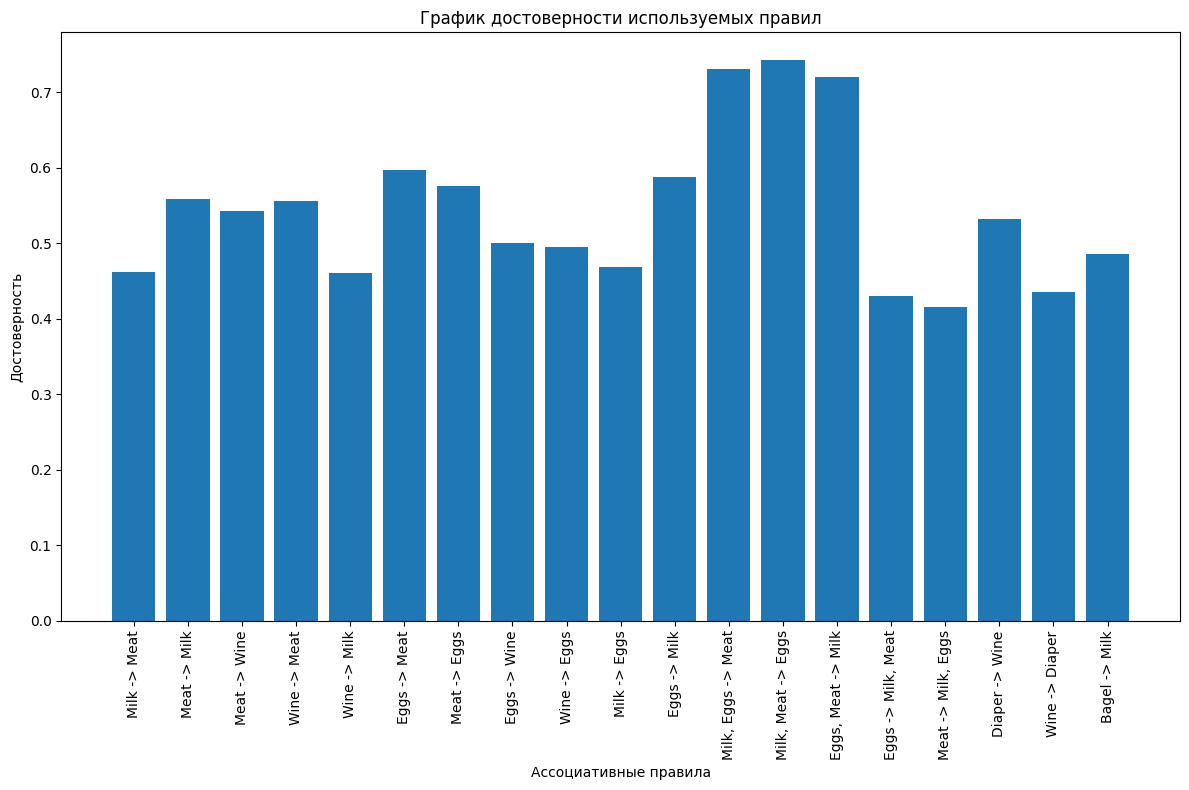

C:\Users\Artur\AppData\Local\Temp\ipykernel_24968\354559901.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


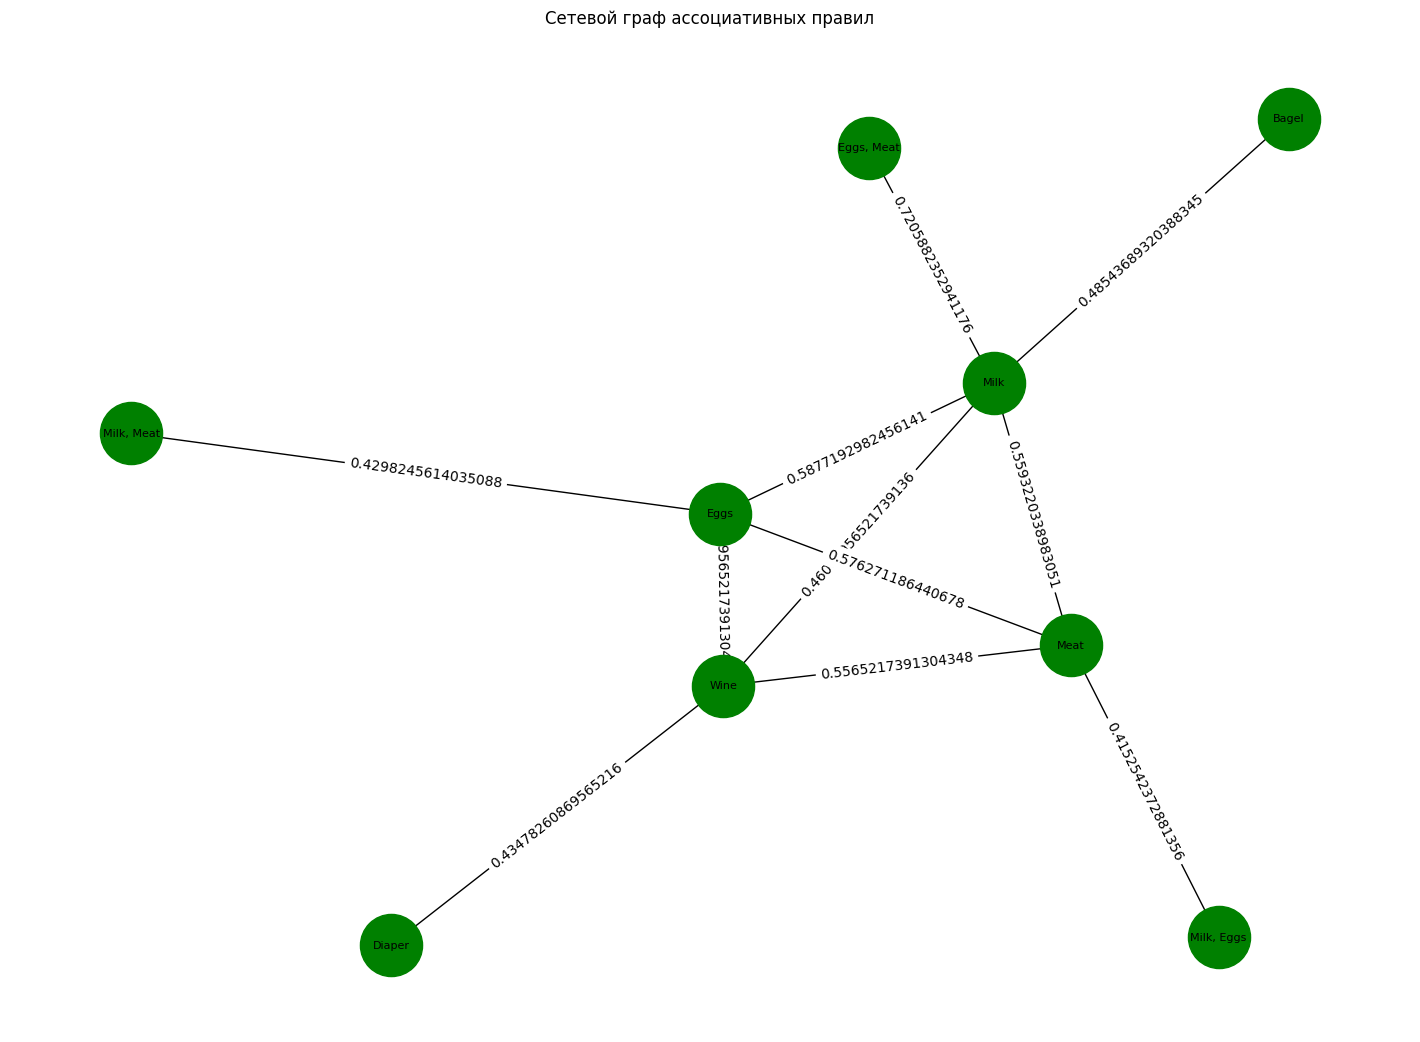

In [4]:
from mlxtend.frequent_patterns import fpgrowth

#Алгоритм FPG
df2 = fpgrowth(data, min_support=min_support, use_colnames = True)
arl_analysis(df2)

### Анализ результатов
Наиболее часто встречающиеся товары: **Milk**, **Meat**, **Wine**, **Eggs**.

**Ассоциативные правила:**

| Правило | Support | Confidence | Lift | Интерпретация |
| --- | --- | --- | --- | --- |
| (Milk, Eggs) -> Meat | 0.156 | 0.73 | 1.95 | Высокая достоверность: сочетание молока и яиц часто сопровождается покупкой мяса |
| (Milk, Meat) -> Eggs | 0.156 | 0.74 | 2.05 | Самое сильное правило: покупка молока и мяса увеличивает шанс покупки яиц в 2 раза |
| (Eggs, Meat) -> Milk | 0.156 | 0.72 | 1.59 | Молоко часто дополняет мясо и яйца, типичный продуктовый набор |
| (Eggs) -> Meat |0.216 | 0.60 | 1.59 | Частая совместная покупка яиц и мяса |
| (Meat) -> Wine | 0.203 | 0.54 | 1.49 | Классическая ассоциация "мясо + вино" |
| (Diaper) -> Wine | 0.159 | 0.53 | 1.46 | Поведенческая связь (покупки семейных покупателей) |
| (Bagel) -> Milk | 0.159 | 0.49 | 1.07 | Слабая, почти случайная связь (lift = ~1) |

**Полезные и тривиальные правила**
- Полезные правила:
    - (Milk, Meat) -> Eggs
    - (Milk, Eggs) -> Meat
    - (Eggs, Meat) -> Milk
    - (Meat) -> Wine
    - (Diaper) -> Wine
- Тривиальные правила:
    - (Bagel) -> Milk
    - (Wine) -> Milk

**Сравнение с Apriori:**

Результаты FPG практически совпадают, что подтверждает стабильность закономерностей в данных.

Но FPG, по сравнению с Apriori, работает быстрее и без повторного сканирования транзакций, поэтому он более эффективен при больших объёмах данных.

**Общий вывод:**

FPG подтвердил закономерности, вывленные Apriori, но с меньшими вычислительными затратами.

---

## Подбор минимальных значений поддержки для составления правил из 1, 2 и др. кол-во объектов

In [14]:
def find_min_support(df, max_len=3, step=0.01):
    min_supports = {}
    
    for length in range(1, max_len + 1):
        support = 1.0
        found = False
        while support > 0:
            freq_itemsets = apriori(df, min_support=support, use_colnames=True)
            freq_itemsets_len = freq_itemsets[freq_itemsets['itemsets'].apply(lambda x: len(x) == length)]
            if not freq_itemsets_len.empty:
                min_supports[length] = support
                found = True
                break
            support -= step
        if not found:
            min_supports[length] = None

    return min_supports

min_supports = find_min_support(data, max_len=6, step=0.01)
print("Минимальные поддержки для наборов разной длины:")
for length, support in min_supports.items():
    print(f"{length}-элементные наборы: {support:.2f}")

Минимальные поддержки для наборов разной длины:
1-элементные наборы: 0.45
2-элементные наборы: 0.21
3-элементные наборы: 0.15
4-элементные наборы: 0.07
5-элементные наборы: 0.02
6-элементные наборы: 0.01



---

## Эксперимент с изменением параметров

In [24]:
experiments = [
    {'min_support': 0.45, 'min_confidence': 0.4},
    {'min_support': 0.21, 'min_confidence': 0.5},
    {'min_support': 0.15, 'min_confidence': 0.6},
    {'min_support': 0.07, 'min_confidence': 0.7},
    {'min_support': 0.02, 'min_confidence': 0.3},
]

cnt = 0

for exp in experiments:
    cnt += 1
    print(f'\n{cnt}. Эксперимент: min_support={exp['min_support']}, min_confidence={exp['min_confidence']}')

    freq_itemsets = apriori(data, min_support=exp['min_support'], use_colnames=True)
    print(f"Кол-во частых наборов: {len(freq_itemsets)}")

    rules = association_rules(freq_itemsets, metric="confidence", min_threshold=exp['min_confidence'])
    print(f"Кол-во правил: {len(rules)}")

    if not rules.empty:
        rules_display = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()
        rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
        rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))
        print(rules_display.head())
    else:
        print("Правил нет при таких параметрах.")


1. Эксперимент: min_support=0.45, min_confidence=0.4
Кол-во частых наборов: 1
Кол-во правил: 0
Правил нет при таких параметрах.

2. Эксперимент: min_support=0.21, min_confidence=0.5
Кол-во частых наборов: 11
Кол-во правил: 3
  antecedents consequents   support  confidence      lift
0        Eggs        Meat  0.215873    0.596491  1.592328
1        Meat        Eggs  0.215873    0.576271  1.592328
2        Eggs        Milk  0.212698    0.587719  1.294626

3. Эксперимент: min_support=0.15, min_confidence=0.6
Кол-во частых наборов: 18
Кол-во правил: 3
  antecedents consequents   support  confidence      lift
0  Milk, Eggs        Meat  0.155556    0.731343  1.952315
1  Milk, Meat        Eggs  0.155556    0.742424  2.051435
2  Eggs, Meat        Milk  0.155556    0.720588  1.587310

4. Эксперимент: min_support=0.07, min_confidence=0.7
Кол-во частых наборов: 59
Кол-во правил: 5
        antecedents consequents   support  confidence      lift
0        Milk, Eggs        Meat  0.155556    0.73134

## Анализ результатов
1. **min_support=0.45, min_confidence=0.4**

При высокой поддержке формируются самые популярные отдельные товары, но правила по ним построить нельзя, т.к. для правила необходимо, чтобы был хотя бы двухэлементный набор. Т.е. даже низкая достоверность не поможет.

2. **min_support=0.21, min_confidence=0.5**

При таких параметрах уже появляются реальные правила. Confidence показывает, что если товар A куплен, то товар B покупают в ~60% случаев, а по lift можно судить, что товары действительно связаны (покупка одного товара повышает вероятность покупки другого).

3. **min_support=0.15, min_confidence=0.6**

Появились правила из трёх элементов с более высокой достоверностью, которые показывают более сложные связи между товарами. Lift в некоторых случаях близок к 2, что говорит о сильной ассоциации.

4. **min_support=0.07, min_confidence=0.7**

Низкая поддержка позволяет выявить редкие комбинации, а высокая достоверность гарантирует, что правила остаются надёжными. Однако, если не ограничить confidence, то слишком низка поддержка может привести к шумным правилам.

5. **min_support=0.02, min_confidence=0.3**

Очень низкая поддержка и низкая достоверность привели к большому кол-ву правил, многие из которых имеют слабую связь между товарами: lift близок к 1, что показывает почти случайные ассоциации.

**Общие выводы:**
- Support контролирует насколько часто наборы встречаются в данных: чем ниже support, тем более редкие комбинации попадаются;
- Confidence показывает надёжность правила: чем выше, тем выше вероятность покупки товара B при покупке товара A;
- Оптимальный баланс для частых двух- и трёхэлементных наборов: support ~0.15-0.21, confidence ~0.6-0.7 - такие параметры позволяют выявить полезные правила без шума редких комбинаций.

---

## Вариант визуализации ассоциативных правил и метрик

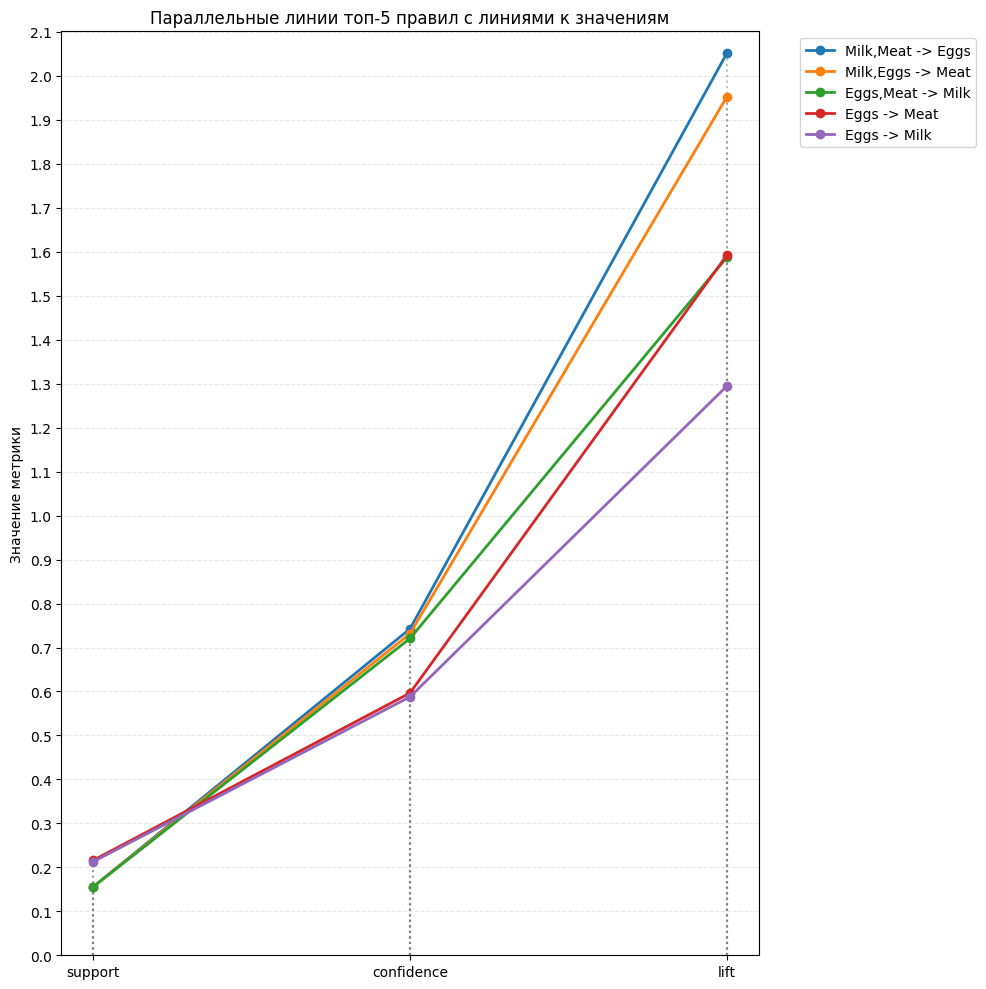

In [52]:
import numpy as np

df1 = apriori(data, min_support=min_support, use_colnames = True)

min_threshold = 0.5
rules = association_rules(df1, metric = "confidence", min_threshold = min_threshold)

top_rules = rules.sort_values(by='confidence', ascending=False).head(5)
top_rules['rule'] = top_rules['antecedents'].apply(lambda x: ','.join(list(x))) + ' -> ' + top_rules['consequents'].apply(lambda x: ','.join(list(x)))

metrics =['support', 'confidence', 'lift']
x = np.arange(len(metrics))

plt.figure(figsize=(10,10))

y_min = top_rules[['support', 'confidence', 'lift']].values.min()
y_min = min(y_min, 0)
y_max = top_rules[['support', 'confidence', 'lift']].values.max() + 0.05

for idx, (_, row) in enumerate(top_rules.iterrows()):
    y = [row[m] for m in metrics]

    for i in range(len(x)):
        plt.vlines(x[i], 0, y[i], colors='gray', alpha=0.5, linestyles='dotted')
    
    plt.plot(x, y, marker='o', label=row['rule'], linewidth=2)

plt.xticks(x, metrics)
plt.ylabel('Значение метрики')
plt.title('Параллельные линии топ-5 правил с линиями к значениям')

plt.yticks(np.arange(y_min, y_max + 0.01, 0.1))
plt.ylim(y_min, y_max)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()